In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("covtype.csv")
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [7]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

y_pred = model.predict(X_test)

mask = ~pd.isna(y_test)
y_test_clean = y_test[mask]
y_pred_clean = y_pred[mask]

print(classification_report(y_test_clean, y_pred_clean))

              precision    recall  f1-score   support

         1.0       0.95      0.87      0.91     10693
         2.0       0.95      0.98      0.96     25804
         3.0       0.85      0.84      0.84       424
         4.0       0.93      0.97      0.95       419
         5.0       0.91      0.78      0.84       716
         6.0       0.86      0.86      0.86       441
         7.0       0.92      0.94      0.93       423

    accuracy                           0.94     38920
   macro avg       0.91      0.89      0.90     38920
weighted avg       0.94      0.94      0.94     38920



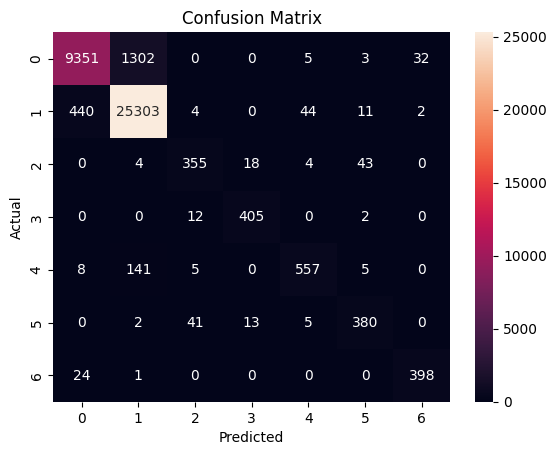

In [8]:
sns.heatmap(confusion_matrix(y_test_clean, y_pred_clean), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
importances = model.feature_importances_
